# I Fully connected feedforward NN with one or more hidden layers

## Topics

(2:45:00)<br>
<code>**1: MLP architecture**</code><br>
<code>**2: Nonlinear activation functions**</code><br>
<code>**3: MPL code**</code><br>
<code>**4: Overfitting and underfitting**</code><br>
<code>**5: Cats/Dogs & custom data loaders**</code><br>




## Fully connected NN

MLP's are fully connected feedforward NN's. Fully connected means that a given layer each unit in that layer is connected to all the other units in the next layer. For instance if we have layer a like this with input layer and another layer with one unit:

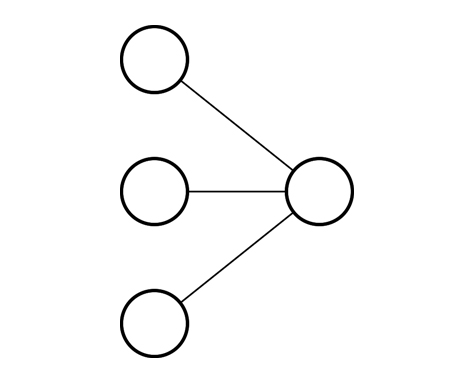

Then each input unit is connected to that next layer unit. Is actually similar to logistic regression in that way. So in logistic regression context we also had everything in the input later being connected to the next layer. Or if we had multiple outputs we had also this setup and this is similar to multilayered perceptron except where in softmax regession we had input and an out layer.

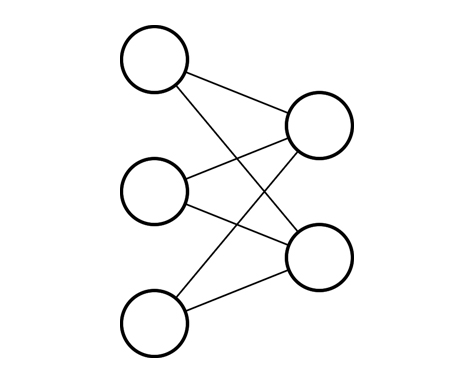

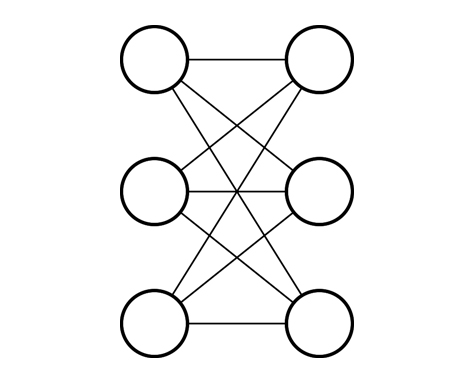

But in MLP there is an <code>**hidden layer**</code> that means that there is another output layer and now we have MLP stucture. And everything is connected that why it is called <code>**fully connected**</code>. And the main difference between MLP perceptron and softmax regression is that we have this hidden layer. Also we use a learning algorithm called <code>**backpropagation**</code> which is just gradient descent using the chain rule. It is essentially very similar to what we have done in the last lectures wen we covered softmax regression. Another term <code>**feedforward**</code> refers to the fact that we go in one direction from left to right in this particular drawing but essentially from the input to the output. Later we will see other networks that are not feedforward for example the are <code>**recurrent neural networks**</code> where we have recurrent layer that goes backwards, there is a time dimension. Not all networks are fully connected like <code>**convoliutional neural netwroks**</code>. 

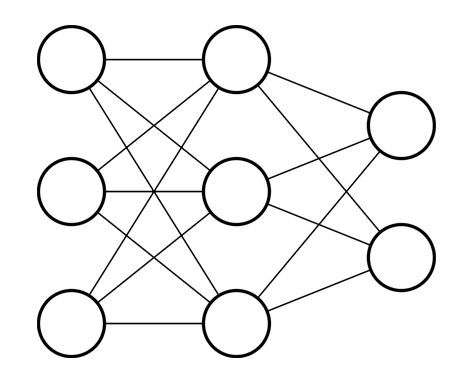

### Computation graphh with multiple fully-connected layers

We have here a two hidden layer perceptron. On left hand side the input layer in between the hidden layer and the output. Since we have a single output unit similar to logistic regression and different from softmax regression this would be a binary classification problem and so for the output we can actually use a sigmoid function 

\begin{multline*}
o := \sigma(z) = \sigma(\mathbf{w}^{\top} \mathbf{x} + b)
\end{multline*}

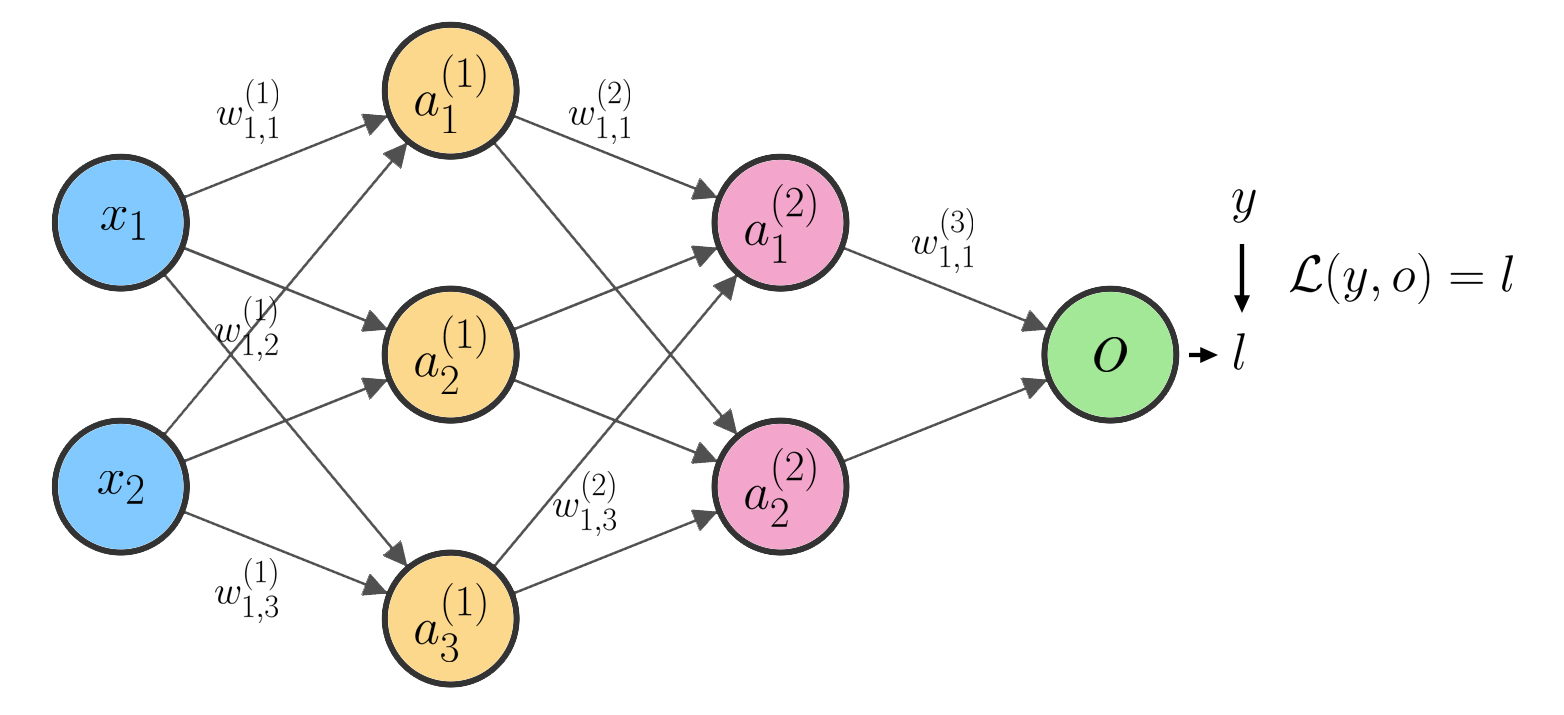

When we compute partial derivates for training this network we can use multivariable chain rule. If we would want to compute partial derivate of this loss function with respect of to one of the weights we would use chain rule to go backwards and then the multivariable chain rule to combine the output from different units. 

\begin{multline*}
\dfrac{\partial l}{\partial w^{(1)}_{1,1}} = \dfrac{\partial l}{\partial o} \cdot \dfrac{\partial o}{\partial a^{(2)}_1}
\cdot \dfrac{\partial a^{(2)}_{1}}{\partial a^{(1)}_{1}} \cdot \dfrac{\partial a^{(1)}_{1}}{\partial w^{(1)}_{1,1}} \ \ +
\dfrac{\partial l}{\partial o} \cdot \dfrac{\partial o}{\partial a^{(2)}_2} \cdot \dfrac{\partial a^{(2)}_2}{\partial a^{(1)}_1} \cdot \dfrac{\partial a^{(1)}_1}{\partial w^{(1)}_{1,1}}
\end{multline*}

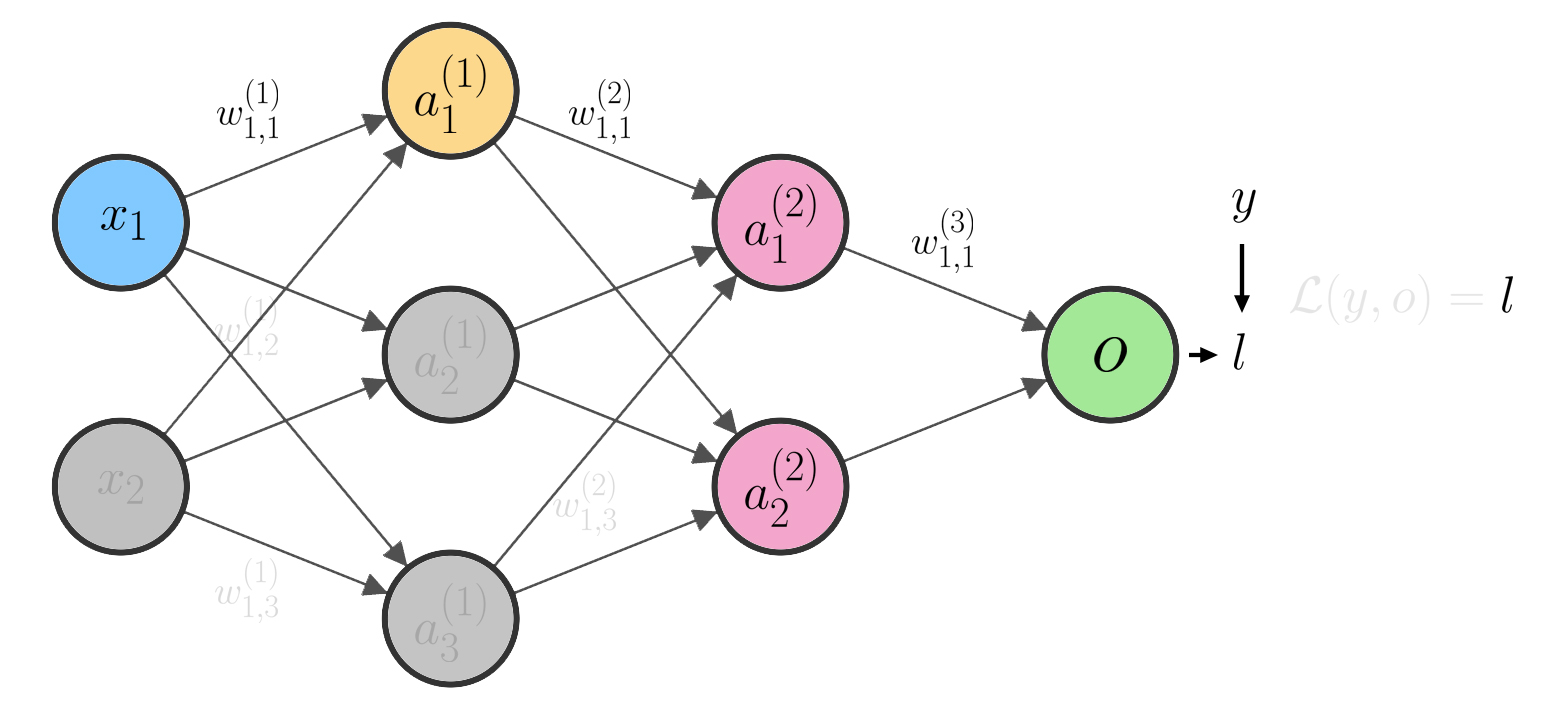

There are two paths and this is how we would update our weight. Notice there are multiple weights, multiple weight layers and they would be updated on the way as well but the rule would be a little bit different. <code>**Try to write it down.**</code><br>
Notice that some part of computation are shared and we can reused some part backpropagating further. And when implementing this in practice there are some tricks to avoid recomputing gradients. But fundamentally that is the same concept that applies to softmax regression. 

### Is it deep learning ?

### The loss is not convex anymore

Linear regression, Adaline, Logistic regression and softmax regression have convex loss functions. This is not the case anymore. In practice we ussually end up at different local minima if we repeat the training by changing the random seed for weight initliazation or shuffling the dataset while leaving all settings the same. In practive though we want to explore diffrent starting weights however because some lead to better soliutions thant others.

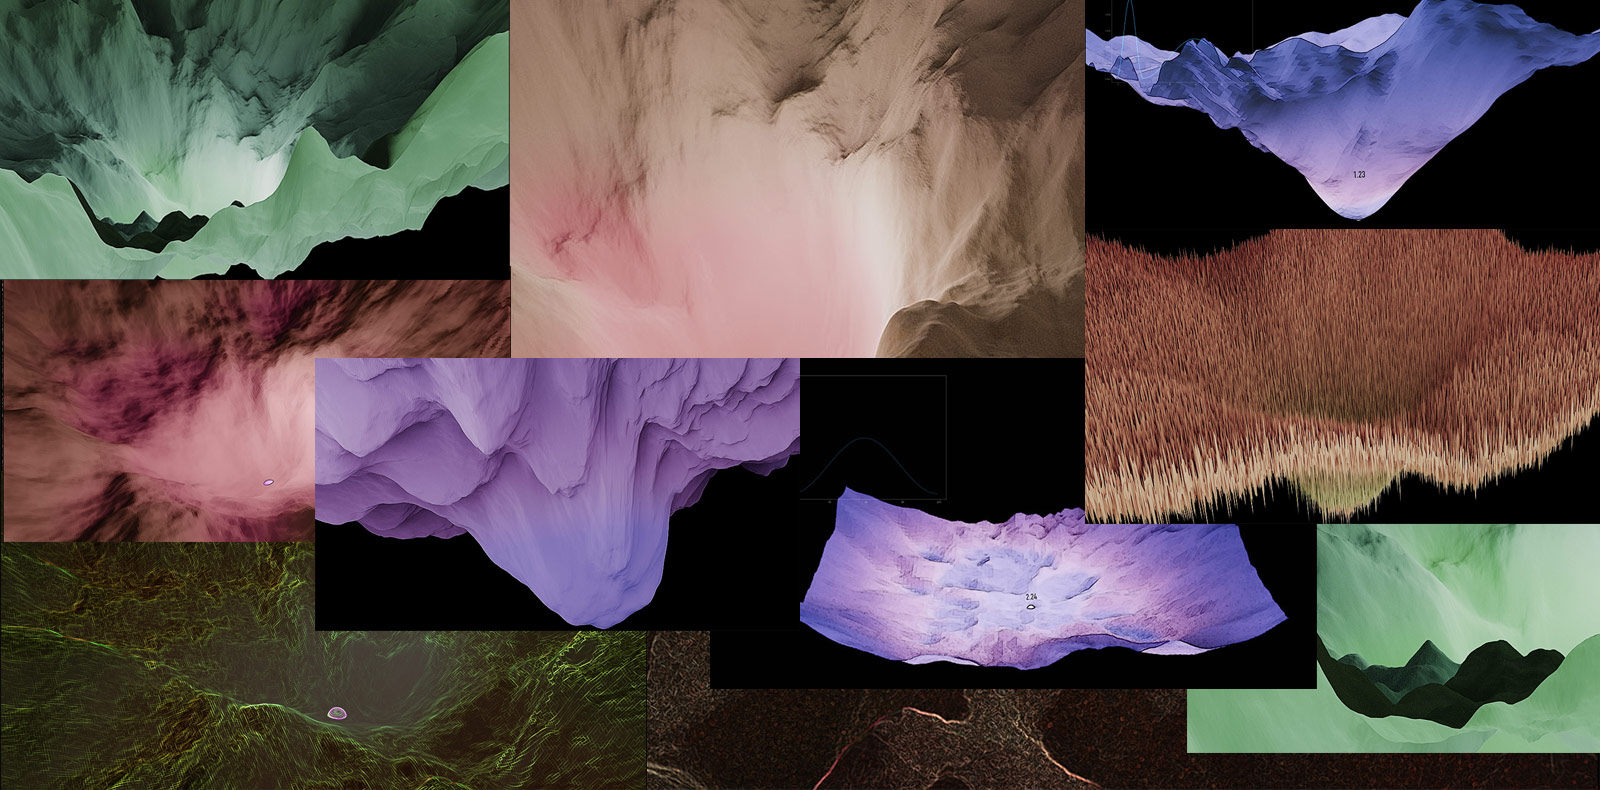

In the case of multilayer perceptrons it is not that simple anymore. We don't have such a nice convex functions where there is a path downward to the global minumum. So in fact these are highly non convex loss surfaces. So imagine that you had two weights in a network so the loss might be higly complex there are many local minima and somewhere one global. And depending on what are our starting weights are by starting with random small values we start in a different position on loss landscape. In practive it is hard to find a global minimum. We never know did we reached the global minumum. Usually common knowledge is that we will end up at some of the local minima. And it is not uncommon that because of that start the neural network training multiple times with different random seed for a given network. Sometime we will get better performance by just channging the random seed. So in papers it is also not uncommon to let say run a network training five or more times and then take maybe te best three runs and then average over them and report the standart deviation. This is how we deal with higly non convex loss surface. There are some tricks that we will go throug like chossing learning rates, chossing initial weights and chossing optimazation algoritmhs that helps jumping out of this local minima once we get stuck. 

### Activation functions

Sigmoid actiavation + MSE has the problem of very <code>**flat gradients**</code> when the output is very wrong i.e 10^-5 probability and class label 1


If we make very wrong predictions we want to have large gradients because then we can update the weights more. But if the gradients are very flat then there is almost zero weight update and then we can fix our problem of the wrong prediction. Recall how the logistic sigmoid function looks like.

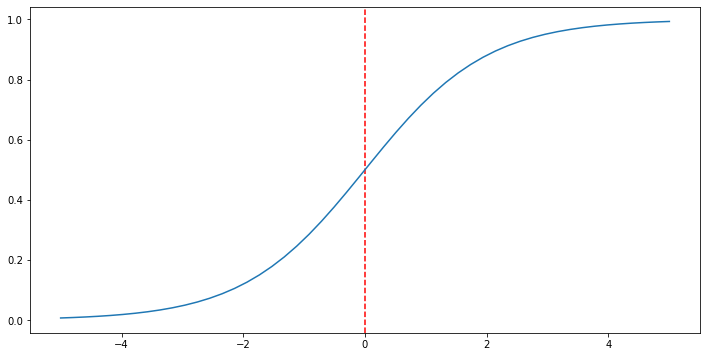

In [17]:
%run ../code_examples/visualize/sigmoid_function.py

Lets that true class label is 1 but algoritm returns very low probability like 0.001. Very negative net input and low probability will result very flat gradients. 

Looking at the derivative loos function with respect to the weights. If we have the derivative of sigmoid combined with MSE doesn't cancel so nicely and it has potential to produce very small value that will update our weights almost by nothing.

\begin{multline*}
\dfrac{\partial \mathcal{L}}{\partial w_{j}} = - \dfrac{2}{n}(\mathbf{y} - \mathbf{a)} \odot \sigma(\mathbf{z}) \odot 
(1 - \sigma(\mathbf{z}))\mathbf{x}^{\top}_{j}
\end{multline*}

Thus it is kind of important to think what kind of activation functions we combine which types of loss functions. And usage of Softmax (forces network to learn probability distribution over lables) in output layer is better than sigmoid because of the mutually exlusive lables as discussed in the softmax lecture. Hence in output layer softmax is usually better than sigmoid but it will not solve the problem. We will cover other activation functions that are a little bit betten than sigmoid functions.

<div class="alert alert-block alert-success">
<h2>Quiz</h2>
    
What happens if we initialize the multilayer perceptron to <code>**all zero weights**</code> ?
</div>

## Non linear activation functions

We are interested in this functions because together with the hidden layers they allow us to model complex nonlinear decsion boundaries and with that we can solve complicated problems, complicated classification problems.

## MPL code

In [ ]:
import torch
import torch.nn.functional as F

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [18]:
import time
import numpy as np

In [ ]:
from torchvision import datasets
from torchvision import transforms

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
RANDOM_SEED = 1
BATCH_SIZE  = 100
NUM_EPOCHS  = 100
DEVICE      = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
train_dataset = datasets.MNIST(
    root      = 'data',
    train     = True,
    transform = transform.ToTensor(),
    download  = True
)

test_dataset  = datasets.MNIST(
    root      = 'data'
    train     = False,
    transform = transform.ToTensor()
)

In [ ]:
train_loader   = DataLoader(
    dataset    = train_dataset,
    batch_size = BATCH_SIZE,
    shuffle    = True
)

test_loader    = DataLoader(
    dataset    = test_dataset,
    batch_size = BATCH_SIZE,
    shuffle    = False
)

In [ ]:
for images, labels in train_loader:
    print('Image batch diemensions', images.shape)
    print('Image label dimensions', labels.shape)

In [ ]:
class MLP(torch.nn.Module):
    def __init__(self, num_features, num_hidden, num_classes):
        super().__init__()
        
        self.num_classes = num_classes
        
        self.linear_1 = torch.nn.Linear(num_features, num_hidden)
        self.linear_1.weight.detach().normal_(0.0, 0.1)
        self.linear_1.bias.detach().zero()
        
        self.linear_out = torch.nn.Linear(num_hidden, num_classes)
        self.linear_out.weight.detach().normal_(0.0, 0.1)
        self.linear_out.bias.detach().zero()
        
    def forward(self, x):
        out = self.linear_1(x)
        out = torch.sigmoid(out)
        logits = self.linear_out(out)
        probas = torch.softmax(logits, dim=1)
        return logits, probas

In [ ]:
torch.manual_seed(RANDOM_SEED)

In [ ]:
model = MLP(
    num_featurs=28*28,
    num_hidden = 100,
    num_classe = 10
)

model = model.to(DEVICE)

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [ ]:
def compute_loss(net, data_loader):
    curr_loss = 0.
    with torch.no_grad():
        for cnt, (features, targets) in enumarate(data_loader):
            fetures = features.view(-1, 28*28).to(DEVICE)
            targets = targets.to(DEVICE)
            logits, proba = net.forward(features)
            loss = F.nll_loss(torch.log(probas), targets)
            # loss = F.cross_entropy(logits, targets)
            curr_loss += loss
        return float(curr_loss)/cnt

In [ ]:
start_time = time.time()
minibatch_cost = []
epoch_cost     = []

In [ ]:
for epoch in range(NUM_EPOCHS):
    model.train()
    for batch_idx, (featurs, targets) in enumerate(train_loader):
        features = features.view(-1, 28*28).to(DEVICE)
        targets  = targets.to(DEVICE)
        
        logits, probas = model(features)
        
        cost = F.nll_loss(torch.log(probas), targets)
        # cost = F.cross_entropy(logits, targets)
        optimizer.zero_grad()
        
        cost.backward()
        minibatch_cost.append(cost.item())
        optimizer.step()
        
        if not batch_idx % 50:
            print('Epoch: %03d/%03d | Batch %03d/%3d | Cost: %.4f' 
                  %(epoch+1, NUM_EPOCHS, batch_idx, len(train_loader),cost.item()))
            
        cost = compute_loss(model, train_loader)
        epoch_cost.append(cost)
        print('Epoch: %03d/%03d Train cost: %.4f' % (
             epoch + 1, NUM_EPOCHS, cost))
        print('Time elapsed: %.2f min' % ((time.time() - start_time)/60))

print('Total training  time: %.2f min' % ((time.time - start_time)/60))

In [ ]:
plt.plot(range(len(minibatch_cost)), minibatch_cost)
plt.ylabel('Cross entropy')
plt.xlabel('Minibatch')
plt.show()

In [ ]:
plt.plot(range(len(epoch_cost)), epoch_cost)
plt.ylabel('Cross entropy')
plt.xlabel('Epoch')
plt.show()

In [ ]:
def compute_accuracy(net, data_loader):
    correct_pred, num_examples = 0, 0
    with torch.no_grad():
        for feature, targets in data_loader:
            features = features.view(-1, 28*28).to(DEVICE)
            targets  = targets.to(DEVICE)
            logits   = net.forward(features)
            predicted_labels = torch.argmax(logits, 1)
            num_examples += targets.size(0)
            correct_pred += (predicted_labels == targets).sum()
        return correct_pred.float()/num_examples * 100
    
print('Training accuracy: %.2f' % compute_accuracy(model, train_loader))
print('Test accuracy: %.2f' % compute_accuracy(model, test_loader))